In [0]:
!pip install keras-bert

  Created wheel for keras-bert: filename=keras_bert-0.80.0-cp36-none-any.whl size=37923 sha256=19fbe664aceb650881b384a7c0aa58c793e4b4169c7f038cf680cb5dbcf28ebd
  Stored in directory: /root/.cache/pip/wheels/63/dc/87/3260cb91f3aa32c0f85c5375429a30c8fd988bbb48f5ee21b0
  Created wheel for keras-transformer: filename=keras_transformer-0.31.0-cp36-none-any.whl size=13385 sha256=ea22cb8a9bb6929a074afffb6e5604d3d2e6e4e04dc40e4ce3b242157a4d2bf1
  Stored in directory: /root/.cache/pip/wheels/a3/c5/9a/5a5130240be614a7a6fa786765d7692ae97f82601e2161bb56
  Created wheel for keras-pos-embd: filename=keras_pos_embd-0.11.0-cp36-none-any.whl size=7553 sha256=a4c6c41b8db71d98dc4c7e8f304746b800024536b504c082dc75c7916809ddd9
  Stored in directory: /root/.cache/pip/wheels/5b/a1/a0/ce6b1d49ba1a9a76f592e70cf297b05c96bc9f418146761032
  Created wheel for keras-multi-head: filename=keras_multi_head-0.22.0-cp36-none-any.whl size=15371 sha256=f79847e8acccaecfbda4a3e06313198b72206635cdfc798241fe6a4fce6c680f
  Stor

In [0]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!mkdir -p ~/.kaggle

import json 

token = {"username":"seunghwan1228","key":"2a8fb35ecd319bf10a02713c306059ca"}

with open('/content/drive/My Drive/Colab Notebooks/Kaggle Kernel/kaggle.json', 'w') as file:
  json.dump(token, file)
  
  
  
!cp drive/'My Drive'/'Colab Notebooks'/'Kaggle Kernel'/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle
!ls -l ~/.kaggle
!cat ~/.kaggle/kaggle.json


# down load path

!kaggle competitions download -c jigsaw-unintended-bias-in-toxicity-classification
!unzip train.csv.zip

kaggle.json
total 4
-rw------- 1 root root 72 Nov  5 00:09 kaggle.json
{"username": "seunghwan1228", "key": "2a8fb35ecd319bf10a02713c306059ca"}Warning: Looks like you're using an outdated API Version, please consider updating (server 1.5.6 / client 1.5.4)
 95% 259M/273M [00:04<00:00, 26.2MB/s]
100% 273M/273M [00:04<00:00, 63.2MB/s]
 42% 5.00M/12.0M [00:00<00:00, 28.4MB/s]
100% 12.0M/12.0M [00:00<00:00, 47.5MB/s]
  0% 0.00/224k [00:00<?, ?B/s]
100% 224k/224k [00:00<00:00, 204MB/s]
Archive:  train.csv.zip
  inflating: train.csv               


In [0]:
!wget https://storage.googleapis.com/bert_models/2019_05_30/wwm_uncased_L-24_H-1024_A-16.zip

--2019-11-05 00:10:25--  https://storage.googleapis.com/bert_models/2019_05_30/wwm_uncased_L-24_H-1024_A-16.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 2607:f8b0:400e:c09::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1248381879 (1.2G) [application/zip]
Saving to: ‘wwm_uncased_L-24_H-1024_A-16.zip’

wwm_uncased_L-24_H- 100%[===================>]   1.16G   141MB/s    in 9.3s    

2019-11-05 00:10:35 (129 MB/s) - ‘wwm_uncased_L-24_H-1024_A-16.zip’ saved [1248381879/1248381879]



In [0]:
!unzip /content/wwm_uncased_L-24_H-1024_A-16.zip

Archive:  /content/wwm_uncased_L-24_H-1024_A-16.zip
   creating: wwm_uncased_L-24_H-1024_A-16/
  inflating: wwm_uncased_L-24_H-1024_A-16/bert_model.ckpt.meta  
  inflating: wwm_uncased_L-24_H-1024_A-16/bert_model.ckpt.data-00000-of-00001  
  inflating: wwm_uncased_L-24_H-1024_A-16/vocab.txt  
  inflating: wwm_uncased_L-24_H-1024_A-16/bert_model.ckpt.index  
  inflating: wwm_uncased_L-24_H-1024_A-16/bert_config.json  


In [0]:
import numpy as np
import pandas as pd
import keras 
import tensorflow as tf
import keras_bert
from tqdm import tqdm

Using TensorFlow backend.


In [0]:
train_df = pd.read_csv('/content/train.csv')

In [0]:
train_df.head()

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,bisexual,black,buddhist,christian,female,heterosexual,hindu,homosexual_gay_or_lesbian,intellectual_or_learning_disability,jewish,latino,male,muslim,other_disability,other_gender,other_race_or_ethnicity,other_religion,other_sexual_orientation,physical_disability,psychiatric_or_mental_illness,transgender,white,created_date,publication_id,parent_id,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
0,59848,0.000000,"This is so cool. It's like, 'would you want yo...",0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-09-29 10:50:41.987077+00,2,NaN,2006,rejected,0,0,0,0,0,0.0,0,4
1,59849,0.000000,Thank you!! This would make my life a lot less...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-09-29 10:50:42.870083+00,2,NaN,2006,rejected,0,0,0,0,0,0.0,0,4
2,59852,0.000000,This is such an urgent design problem; kudos t...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-09-29 10:50:45.222647+00,2,NaN,2006,rejected,0,0,0,0,0,0.0,0,4
3,59855,0.000000,Is this something I'll be able to install on m...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-09-29 10:50:47.601894+00,2,NaN,2006,rejected,0,0,0,0,0,0.0,0,4
4,59856,0.893617,haha you guys are a bunch of losers.,0.021277,0.0,0.021277,0.87234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-09-29 10:50:48.488476+00,2,NaN,2006,rejected,0,0,0,1,0,0.0,4,47


In [0]:
def target_binary(x):
  if x >= 0.5:
    return 1
  else:
    return 0

In [0]:
train_df = train_df.sample(50000, random_state=1228)

In [0]:
train_df['target'] = train_df['target'].apply(target_binary)

In [0]:
train_df.head()

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,bisexual,black,buddhist,christian,female,heterosexual,hindu,homosexual_gay_or_lesbian,intellectual_or_learning_disability,jewish,latino,male,muslim,other_disability,other_gender,other_race_or_ethnicity,other_religion,other_sexual_orientation,physical_disability,psychiatric_or_mental_illness,transgender,white,created_date,publication_id,parent_id,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
1695887,6201290,0,"They interpret law, with bias. Based on what ...",0.0,0.0,0.0,0.2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-10-22 19:36:53.535513+00,54,6200455.0,392044,approved,0,0,1,1,2,0.0,0,5
1440028,5879633,0,"What ""liberal media""?\n\nLOL. All one has to d...",0.1,0.1,0.0,0.3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-09-01 15:36:24.566262+00,102,5853633.0,371291,approved,0,0,0,0,0,0.0,0,10
1562703,6033824,0,it seems the weight of Social Media Journalism...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-09-27 13:35:46.146051+00,100,NaN,379330,approved,0,0,0,0,0,0.0,0,4
1798552,6325421,0,I would bet that the majority of parental leav...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-11-09 22:58:02.139785+00,54,6322920.0,398850,approved,0,0,0,1,1,0.0,4,4
236145,532103,0,"Quite easy, really. Those who knowingly and wi...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016-10-16 21:14:36.652224+00,53,531075.0,148520,approved,0,0,0,0,0,0.0,5,4


In [0]:
train_df.to_csv('train_crop.csv')

In [0]:
BERT_CONFIG = '/content/wwm_uncased_L-24_H-1024_A-16/bert_config.json'
BERT_CP = '/content/wwm_uncased_L-24_H-1024_A-16/bert_model.ckpt'
BERT_VOCAB = '/content/wwm_uncased_L-24_H-1024_A-16/vocab.txt'

In [0]:
DATA_COL = 'comment_text'
LABEL_COL = 'target'

MAXLEN = 128

In [0]:
token_dict = keras_bert.load_vocabulary(BERT_VOCAB)


In [0]:
tokenizer = keras_bert.Tokenizer(token_dict)

In [0]:
len(token_dict)

30522

In [0]:
tokenizer.tokenize('this is test sentence')

['[CLS]', 'this', 'is', 'test', 'sentence', '[SEP]']

In [0]:
tokenizer.encode('this is test sentence')  #return tuple, 0 : tokenize encode, 1 : segment encode  <- word level

([101, 2023, 2003, 3231, 6251, 102], [0, 0, 0, 0, 0, 0])

In [0]:
def convert_data(data_df):
  global tokenizer
  indices, targets= [], []
  for i in tqdm(range(len(data_df))):
    ids, segments = tokenizer.encode(data_df[DATA_COL][i], max_len=SEQ_LEN)
    indices.append(ids)
    data_df[LABEL_COL] = data_df[LABEL_COL].apply(target_binary)
    targets.append(data_df[LABEL_COL][i])
  items = list(zip(indices, targets))
  np.random.shuffle(items)
  indices, targets = zip(*items)
  indices = np.array(indices)
  return [indices, np.zeros_like(indices)], np.array(targets)

In [0]:
def load_data(path):
  data_df= pd.read_csv(path, nrows=50000)
  data_df[DATA_COL] = data_df[DATA_COL].astype('str')
  data_x, data_y = convert_data(data_df)
  return data_x, data_y

In [0]:
SEQ_LEN = 128

train_x, train_y = load_data('/content/train_crop.csv')

100%|██████████| 50000/50000 [14:59<00:00, 55.59it/s]


In [0]:
train_x

[array([[  101,  2017,  2323, ...,  1012,  2339,   102],
        [  101,  2572,  2368, ...,     0,     0,     0],
        [  101,  4171, 16561, ...,     0,     0,     0],
        ...,
        [  101,  2065,  1996, ...,  3338,  2009,   102],
        [  101,  1045,  2215, ...,     0,     0,     0],
        [  101,  6585, 17653, ...,     0,     0,     0]]),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])]

In [0]:
train_x[0].shape

(50000, 128)

In [0]:
model = keras_bert.get_model(token_num = len(token_dict), seq_len=MAXLEN)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



In [0]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input-Token (InputLayer)        (None, 128)          0                                            
__________________________________________________________________________________________________
Input-Segment (InputLayer)      (None, 128)          0                                            
__________________________________________________________________________________________________
Embedding-Token (TokenEmbedding [(None, 128, 768), ( 23440896    Input-Token[0][0]                
__________________________________________________________________________________________________
Embedding-Segment (Embedding)   (None, 128, 768)     1536        Input-Segment[0][0]              
____________________________________________________________________________________________

In [0]:
for ind, i in enumerate(model.layers):
  print(ind, i)

0 <keras.engine.input_layer.InputLayer object at 0x7fade04b5e80>
1 <keras.engine.input_layer.InputLayer object at 0x7fade04b51d0>
2 <keras_bert.layers.embedding.TokenEmbedding object at 0x7fade04b5518>
3 <keras.layers.embeddings.Embedding object at 0x7fade08b67b8>
4 <keras.layers.merge.Add object at 0x7fae4b390400>
5 <keras_pos_embd.pos_embd.PositionEmbedding object at 0x7fade04b5208>
6 <keras.layers.core.Dropout object at 0x7fade04b5eb8>
7 <keras_layer_normalization.layer_normalization.LayerNormalization object at 0x7fade0363518>
8 <keras_multi_head.multi_head_attention.MultiHeadAttention object at 0x7fadde8926a0>
9 <keras.layers.core.Dropout object at 0x7fade04b5f60>
10 <keras.layers.merge.Add object at 0x7faddeb933c8>
11 <keras_layer_normalization.layer_normalization.LayerNormalization object at 0x7fade0351978>
12 <keras_position_wise_feed_forward.feed_forward.FeedForward object at 0x7fade0351cf8>
13 <keras.layers.core.Dropout object at 0x7fade034f080>
14 <keras.layers.merge.Add obj

In [0]:
from keras.utils import plot_model

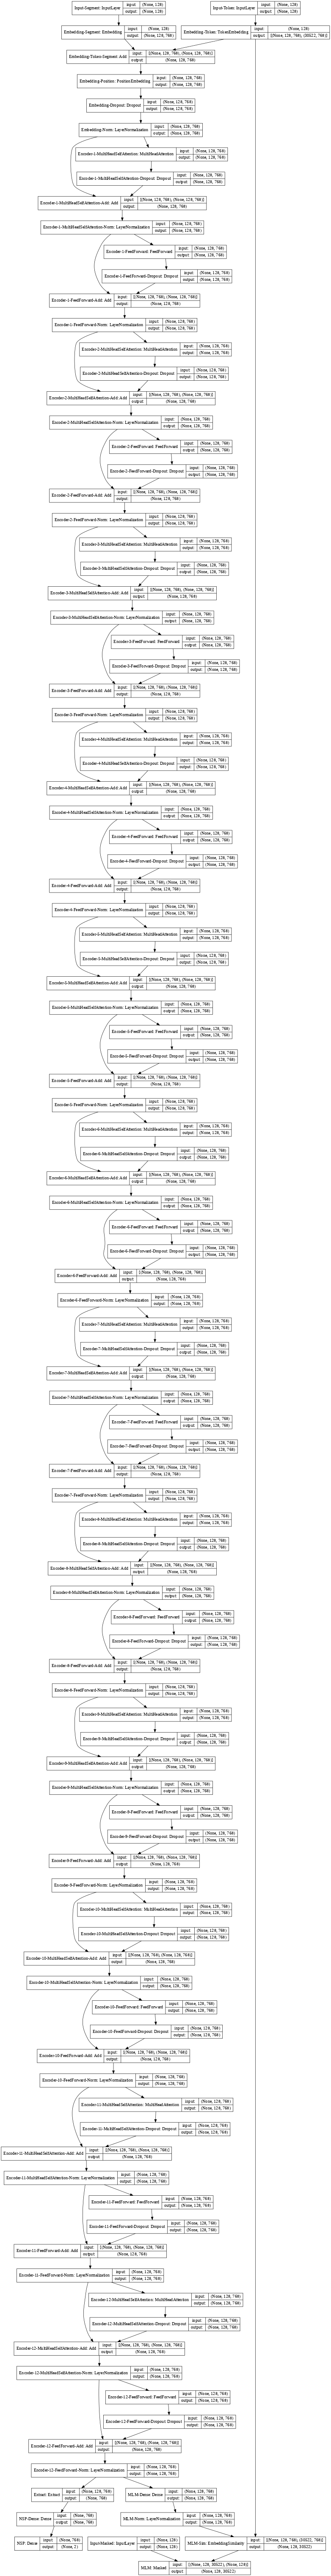

In [0]:
plot_model(model, show_shapes=True, dpi=50)

In [0]:
bert_input = model.input[:2]

bert_out = model.layers[-6].output
real_out = keras.layers.Dense(1, activation='sigmoid')(bert_out)

bert_model = keras.models.Model(bert_input, real_out)

bert_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [52]:
bert_model.input

[<tf.Tensor 'Input-Token:0' shape=(?, 128) dtype=float32>,
 <tf.Tensor 'Input-Segment:0' shape=(?, 128) dtype=float32>]

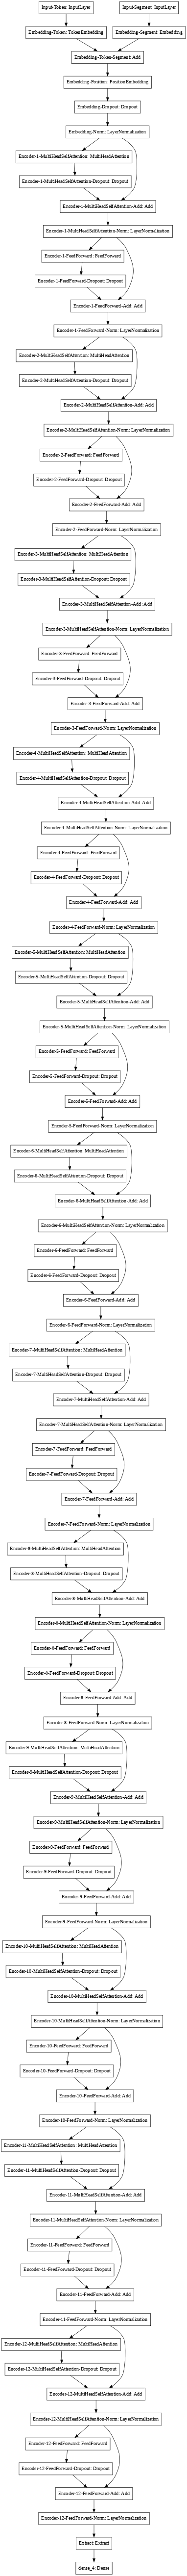

In [51]:
plot_model(bert_model, dpi=50)

In [0]:
train_x

[array([[  101,  2017,  2323, ...,  1012,  2339,   102],
        [  101,  2572,  2368, ...,     0,     0,     0],
        [  101,  4171, 16561, ...,     0,     0,     0],
        ...,
        [  101,  2065,  1996, ...,  3338,  2009,   102],
        [  101,  1045,  2215, ...,     0,     0,     0],
        [  101,  6585, 17653, ...,     0,     0,     0]]),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])]

In [0]:
bert_model.fit(train_x, train_y, epochs=10, batch_size=32)




Epoch 1/10





50000/50000 [==============================] - 2385s 48ms/step - loss: 1.5103 - acc: 0.9050
Epoch 2/10
12736/50000 [======>.......................] - ETA: 29:24 - loss: 1.2744 - acc: 0.9209